In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [215]:
df=pd.read_csv("risali.csv")
df.head()

,date,population
0,15-01-2022,45
1,29-01-2022,53
2,16-02-2022,50
3,25-03-2022,52
4,06-05-2022,47


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        14 non-null     object
 1   population  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


In [217]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [218]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-218-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [219]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
 from prophet import Prophet

In [221]:
population=df.groupby('date')['population'].sum().reset_index()

In [222]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [223]:
model=Prophet(interval_width=0.95)

In [224]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/a20wmeh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/xpey5iup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70754', 'data', 'file=/tmp/tmpqki2d_87/a20wmeh4.json', 'init=/tmp/tmpqki2d_87/xpey5iup.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelos1bpaki/prophet_model-20230421063757.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:37:57 - cmdstanpy - INFO - Chain [1] start processing
IN

In [225]:
future_dates=model.make_future_dataframe(periods=30)

In [226]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-15  45.057816   31.699956   57.490682    45.057816    45.057816   
1  2022-01-29  45.894088   34.364416   57.479039    45.894088    45.894088   
2  2022-02-16  46.969296   35.141059   58.568511    46.969296    46.969296   
3  2022-03-25  49.179444   37.470260   60.605411    49.179444    49.179444   
4  2022-05-15  52.225865   40.262328   65.465162    52.225865    52.225865   
5  2022-06-05  53.480274   41.421063   65.418302    53.480274    53.480274   
6  2022-06-28  54.854150   41.866108   68.302571    54.854150    54.854150   
7  2022-07-27  56.586428   44.309013   68.802147    56.586428    56.586428   
8  2022-09-29  60.409389   47.530509   71.714694    60.409389    60.409389   
9  2022-10-19  61.604064   49.451455   73.573236    61.604064    61.604064   
10 2022-11-22  63.635011   51.868461   75.630522    63.635011    63.635011   
11 2022-12-31  65.964628   54.786060   77.610453    65.964628   

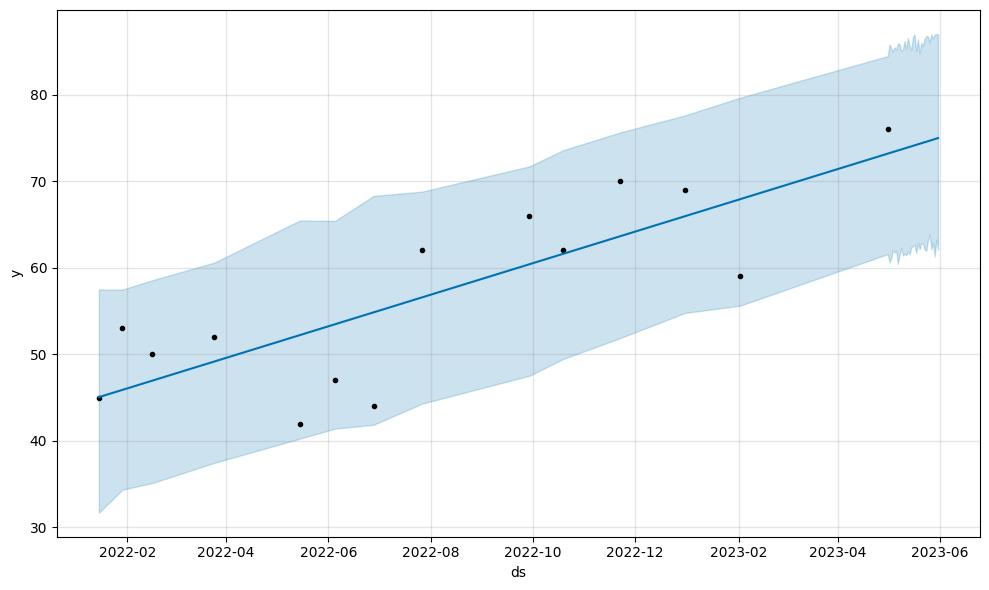

In [227]:
model.plot(forecast)
print(forecast)

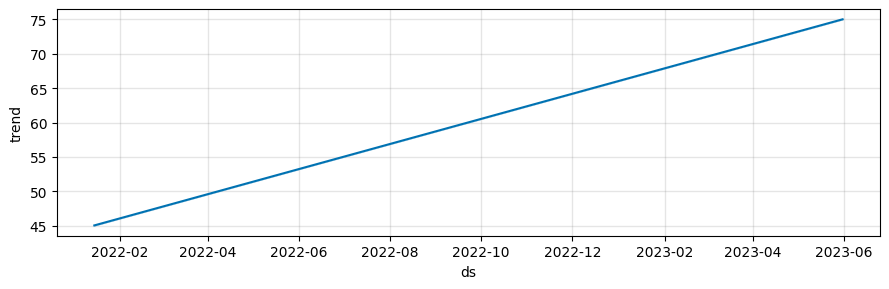

In [228]:
component=model.plot_components(forecast)

In [229]:
 model1=Prophet(interval_width=0.95)

In [230]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/1b0biadj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/6xxrqxre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71328', 'data', 'file=/tmp/tmpqki2d_87/1b0biadj.json', 'init=/tmp/tmpqki2d_87/6xxrqxre.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modeldajzdyx_/prophet_model-20230421063811.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:38:11 - cmdstanpy - INFO - Chain [1] start processing
IN

In [231]:
future_dates=model1.make_future_dataframe(periods=10)

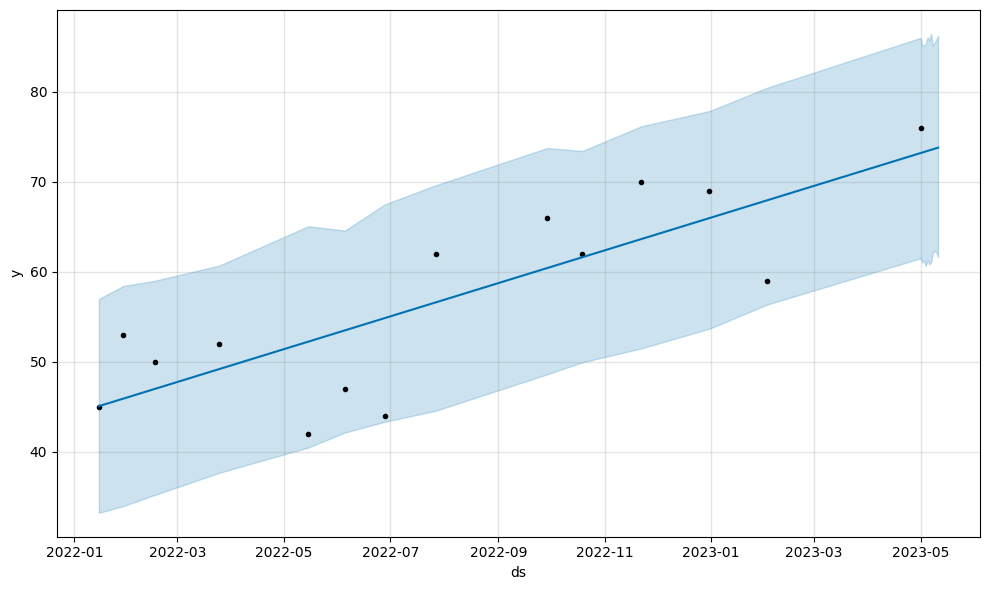

In [232]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-15  45.057816   33.205145   56.979678    45.057816    45.057816   
1  2022-01-29  45.894088   33.945130   58.417857    45.894088    45.894088   
2  2022-02-16  46.969296   35.187317   58.996170    46.969296    46.969296   
3  2022-03-25  49.179444   37.648024   60.684151    49.179444    49.179444   
4  2022-05-15  52.225865   40.459406   65.059575    52.225865    52.225865   
5  2022-06-05  53.480274   42.123202   64.576654    53.480274    53.480274   
6  2022-06-28  54.854150   43.324276   67.496237    54.854150    54.854150   
7  2022-07-27  56.586428   44.540554   69.611107    56.586428    56.586428   
8  2022-09-29  60.409389   48.595811   73.752093    60.409389    60.409389   
9  2022-10-19  61.604064   49.924728   73.416165    61.604064    61.604064   
10 2022-11-22  63.635011   51.482687   76.171598    63.635011    63.635011   
11 2022-12-31  65.964628   53.671984   77.867821    65.964628   

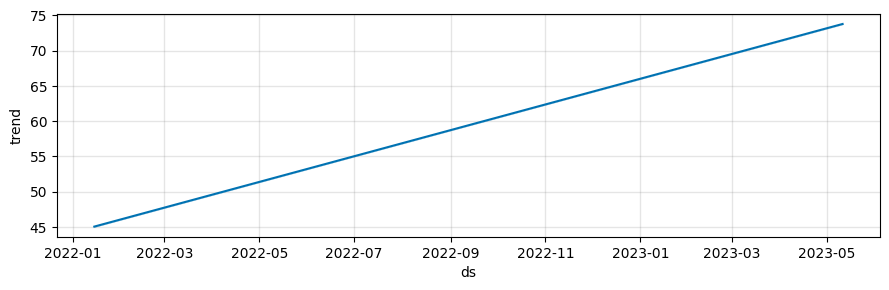

In [233]:
week=model1.plot_components(forecasting)
print(forecasting)